In [1]:
import os

current_path = os.getcwd()
mmpretrain_path = os.path.join(current_path, '..')
os.chdir(mmpretrain_path)

In [2]:
from mmengine.config import Config, DictAction
from mmengine.runner import Runner

import mmpretrain
from mmpretrain.registry import DATASETS
mmpretrain.__version__

/home/theone/miniconda3/envs/cchess_reg/lib/python3.10/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


'1.2.0'

In [3]:
from cchess_reg.datasets import *

In [4]:
config = Config.fromfile('configs/swinv2-nano_cchess16-256-transform-preview.py')
dataset = DATASETS.build(config.train_dataloader.dataset)

KeyboardInterrupt: 

In [5]:

dict_cate_names = {
    'point': '.',
    'other': 'x',
    'red_king': 'K',
    'red_advisor': 'A',
    'red_bishop': 'B',
    'red_knight': 'N',
    'red_rook': 'R',
    'red_cannon': 'C',
    'red_pawn': 'P',
    'black_king': 'k',
    'black_advisor': 'a',
    'black_bishop': 'b',
    'black_knight': 'n',
    'black_rook': 'r',
    'black_cannon': 'c',
    'black_pawn': 'p',
}

cate_names = list(dict_cate_names.values())
def label_to_str(label):

    output = [cate_names[i] for i in label]
    output = ''.join(output)
    # 每 9 个字符插入一个换行符
    output = '\n'.join([output[i:i+9] for i in range(0, len(output), 9)])
    return output

In [6]:
import cv2
import matplotlib.pyplot as plt

def show_origin_and_transform(index = 0):
    item = dataset[index]

    try:
        img_path = item['data_samples'].img_path

        plt.subplot(1, 2, 1)
        origin_img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        ann_path = img_path.replace('.jpg', '.txt').replace('.png', '.txt')
        # 读取 ann_path 文件
        ann_text = ''
        with open(ann_path, 'r') as f:
            ann_text = f.read()
        
        # to rgb
        plt.imshow(origin_img_rgb)
        origin_title = 'origin \n'
        origin_title += ann_text
        plt.title(origin_title, fontfamily='monospace')
        plt.subplot(1, 2, 2)
        # # to rgb
        transform_img = item['inputs'].numpy().transpose(1, 2, 0)
        # # bgr to rgb

        transform_img = transform_img[...,::-1]
        plt.imshow(transform_img)
        
        gt_label = item['data_samples'].gt_label.tolist()
        
        
        transform_title = 'transform \n'
        transform_title += label_to_str(gt_label)
        plt.title(transform_title, fontfamily='monospace')
        plt.show()
        # 打印  路径
    except Exception as e:
        item_data_samples = item['data_samples']
        print("has error")
        print(item_data_samples)
        raise e

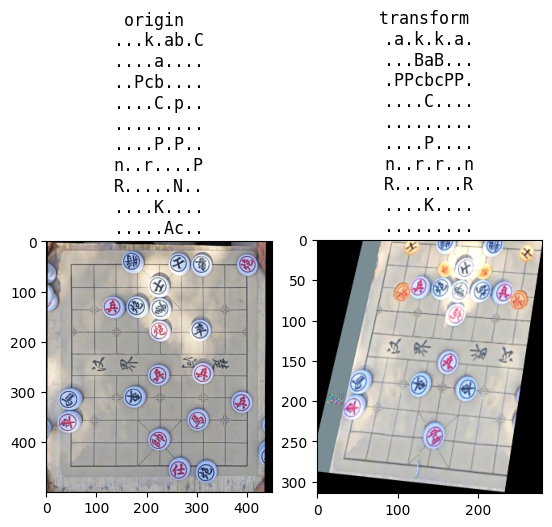

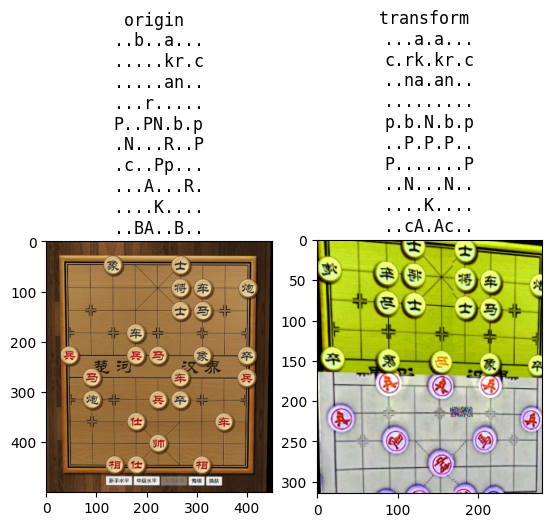

In [28]:
# 循环 N 次
len_dataset = len(dataset)
for i in range(2):
    index = i % len_dataset
    show_origin_and_transform(index + 100)
